# **Project Name**    -  HOTEL BOOKING ANALYSIS


**Project Type - EDA**

**Team Name**  - *BrainDrain*

**Contribution** - *Individual*

**Member Name** - *J.SHRINIVAS*

# **Problem Statement**


* Explore and analysis of data to discover important factors that govern the bookings in a hotel.*

# Business Objective

*Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.*

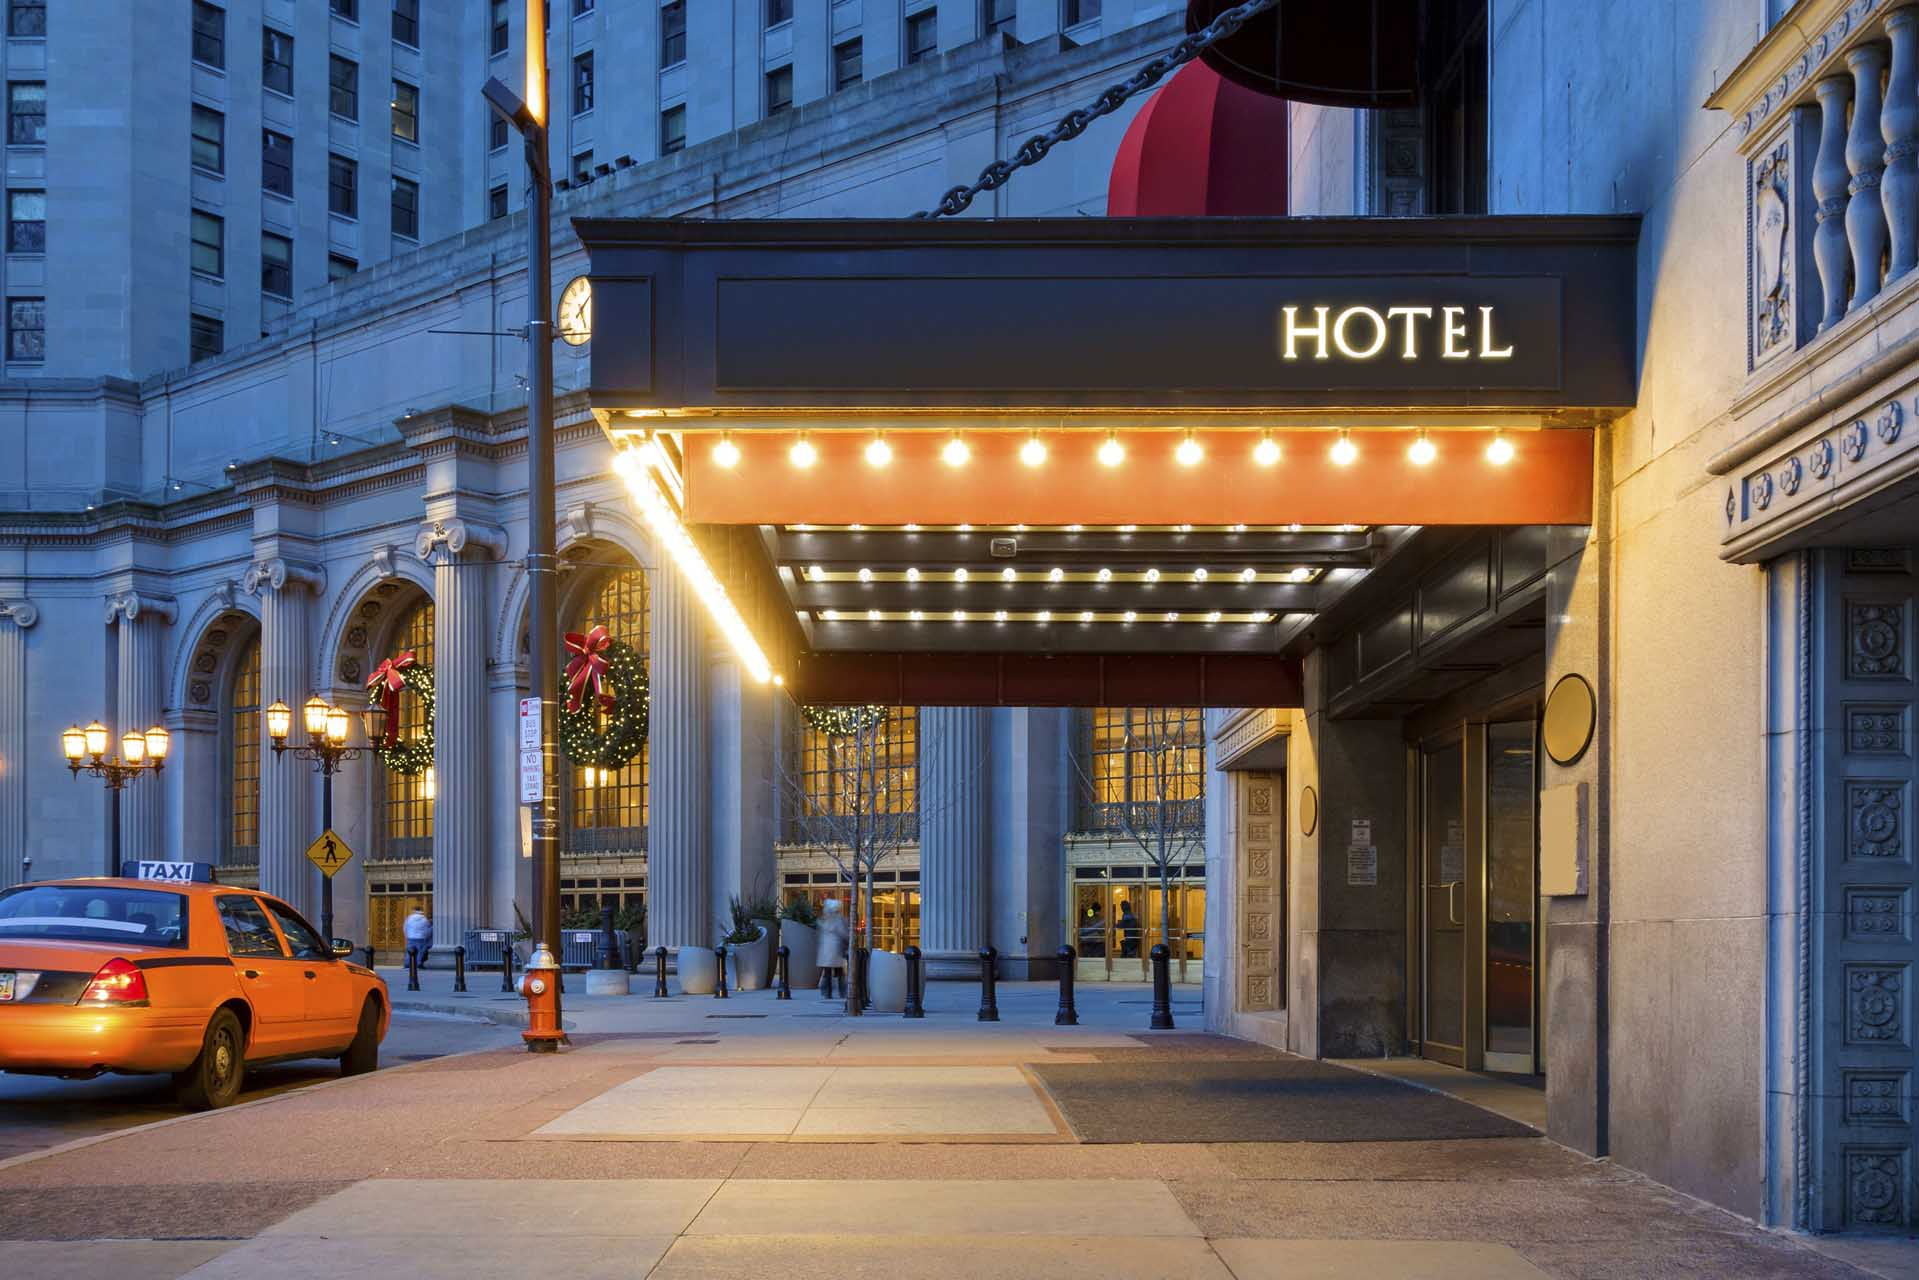

# **Importing Essential Libraries**

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 28
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams["axes.labelsize"] = 23
plt.rcParams["legend.fontsize"] = 18
plt.rcParams["legend.title_fontsize"] = 18

# **Mounting Drive**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Loading CSV file**

In [3]:
csv_loc = "/content/drive/My Drive/Capstone Project/Hotel Bookings.csv"
df = pd.read_csv(csv_loc)

# **Data Collection and Understanding**

In [4]:
# Let's check for total number of rows and columns in the data set.

print(f'We have {df.shape[0]} number of rows')
print(f'We have {df.shape[1]} number of columns')

We have 119390 number of rows
We have 32 number of columns


In [8]:
# Lets see how our data set looks for limited rows.

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Let's go through the info of data.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

*Clearly we got the idea of Null and Not Null values from above.*

In [6]:
# Lets create a copy of our data so that we can operate in the copy of data and the original data remains unharmed.

df1 = df.copy()

# **Data Description**

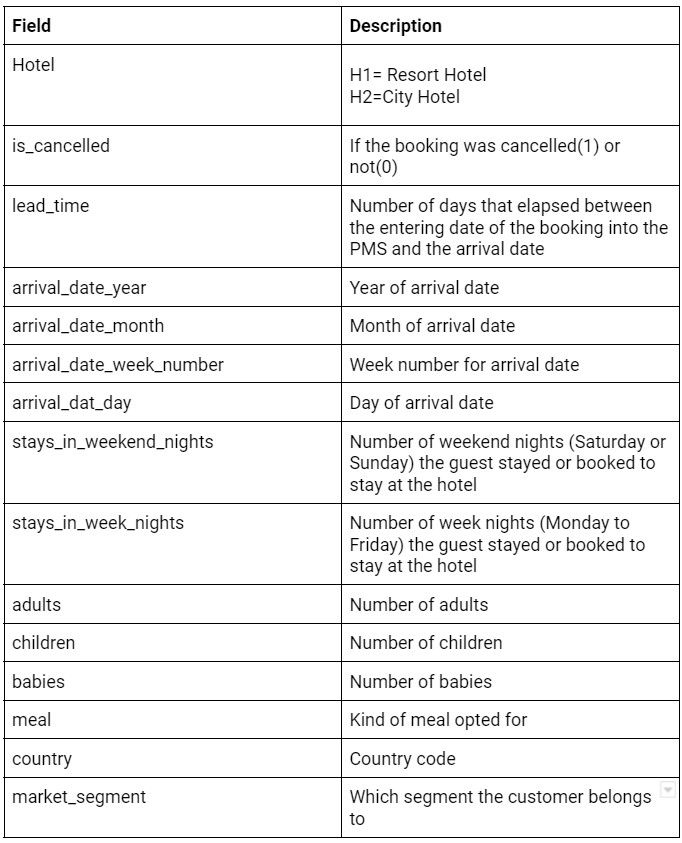

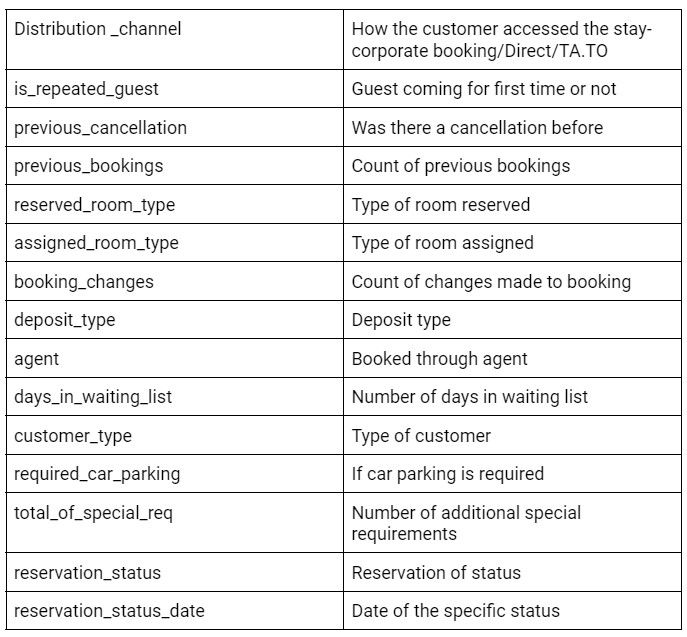

In [11]:
# Let's have a look to the column names in our data set.

list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [13]:
# Here reservation_status_date is of object type, let's convert it into date type.

df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')
df1['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

*Alright the Data collection and understanding part is finished here.*


# **Data Cleaning and Manipulation**

***Checking for NULL values in the data set.***

In [21]:
# Check for NULL values.

df1.isna().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0


*So we have 4 columns that have NULL values [ 'company' , 'agent' , 'country' , 'children' ]*

*Here we can simply replace values of 'company' , 'agent' and 'children' to zero.*
*But for 'country' we can't assgign zero so we will simply put 'other' in place of NULL.*

In [24]:
# filling NULL values of column company with 0.
df1['company'].fillna(0 , inplace=True)

# filling NULL values of column agent with 0.
df1['agent'].fillna(0 , inplace=True)

# filling NULL values of column children with 0.
df1['children'].fillna(0 , inplace=True)

# filling NULL values of column country with other.
df1['country'].fillna('other', inplace=True)

In [25]:
df1.isna().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0


*As we can see above we have no NULL values.*

***Checking for Duplicate values in the data set.***

In [26]:
# Lets check for duplicate values in the data set.

df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

*Let's drop the duplicate values from the data set.*

In [33]:
# Dropping duplicate.

df1 = df1.drop_duplicates()

In [34]:
# The new shape of the DataFrame is
df1.shape

(87396, 32)

*For people to stay inside the hotel room there must be atleast one adult or one children or one baby inside the room. If there sum total is zero that means there is no booking.*

In [38]:
# Let's check for no booking by simply adding the number of adults, number of childrens and number of babies.

len(df1[df1['adults'] + df1['children'] + df1['babies']==0])

166

*There are 166 rows which shows there were no bookings.*

In [40]:
# So we need to remove those 166 rows for more performing more efficient operation in the data set.

df1.drop(df1[df1['adults'] + df1['children'] + df1['babies']==0].index, inplace=True)

<ipython-input-40-39d470629ff2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1['adults'] + df1['children'] + df1['babies']==0].index, inplace=True)


In [41]:
df1.shape

(87230, 32)

We have successfully reduced 166 more rows.

In [52]:
# Let's have a look for unique categories in the various columns.

unique_values = set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe())

for i in unique_values:
  print(f"Unique values in {i} are : {df1[i].unique()}")

Unique values in reserved_room_type are : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in customer_type are : ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in hotel are : ['Resort Hotel' 'City Hotel']
Unique values in deposit_type are : ['No Deposit' 'Refundable' 'Non Refund']
Unique values in meal are : ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in market_segment are : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in assigned_room_type are : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in distribution_channel are : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in reservation_status are : ['Check-Out' 'Canceled' 'No-Show']


Here we need to add few more columns to process the data efficiently.

In [ ]:
# Adding columns to df1 data set.

df1['total_people'] = df1['adults'] + df1['children'] + df1['babies']
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

We are finished with the Data Cleaning and Manipulation part.